In [76]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)

from salishsea_tools import (
    viz_tools)


In [77]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

## Understanding 

In [78]:
#load clustering

hplc_obs =  pickle.load(open('/ocean/eolson/MEOPAR/obs/NemcekHPLC/HPLCClusterBIOforTereza.pkl','rb'))

def round2(num):
    return int(np.trunc((num+2)/10)*10+2)

BIO_cl_2013 = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))  
BIO_cl_2014 = pickle.load(open('./pkls/BIO_clno_5_2014_reass.pkl', 'rb'))  
BIO_cl_2015 = pickle.load(open('./pkls/BIO_clno_5_2015_reass.pkl', 'rb'))  
BIO_cl_2016 = pickle.load(open('./pkls/BIO_clno_5_2016_reass.pkl', 'rb'))  

plt.rcParams.update({'font.size': 15})

In [79]:
#load cluster dp pkls
BIO_cl_1_sig_2013 = pickle.load(open('./pkls/BIO_cl_1_sig_2013.pkl', 'rb'))  
BIO_cl_2_sig_2013 = pickle.load(open('./pkls/BIO_cl_2_sig_2013.pkl', 'rb'))  
BIO_cl_3_sig_2013 = pickle.load(open('./pkls/BIO_cl_3_sig_2013.pkl', 'rb'))  
BIO_cl_4_sig_2013 = pickle.load(open('./pkls/BIO_cl_4_sig_2013.pkl', 'rb'))  
BIO_cl_5_sig_2013 = pickle.load(open('./pkls/BIO_cl_5_sig_2013.pkl', 'rb')) 

BIO_cl_1_sig_2014 = pickle.load(open('./pkls/BIO_cl_1_sig_2014.pkl', 'rb'))  
BIO_cl_2_sig_2014 = pickle.load(open('./pkls/BIO_cl_2_sig_2014.pkl', 'rb'))  
BIO_cl_3_sig_2014 = pickle.load(open('./pkls/BIO_cl_3_sig_2014.pkl', 'rb'))  
BIO_cl_4_sig_2014 = pickle.load(open('./pkls/BIO_cl_4_sig_2014.pkl', 'rb'))  
BIO_cl_5_sig_2014 = pickle.load(open('./pkls/BIO_cl_5_sig_2014.pkl', 'rb'))  

BIO_cl_1_sig_2015 = pickle.load(open('./pkls/BIO_cl_1_sig_2015.pkl', 'rb'))  
BIO_cl_2_sig_2015 = pickle.load(open('./pkls/BIO_cl_2_sig_2015.pkl', 'rb'))  
BIO_cl_3_sig_2015 = pickle.load(open('./pkls/BIO_cl_3_sig_2015.pkl', 'rb'))  
BIO_cl_4_sig_2015 = pickle.load(open('./pkls/BIO_cl_4_sig_2015.pkl', 'rb'))  
BIO_cl_5_sig_2015 = pickle.load(open('./pkls/BIO_cl_5_sig_2015.pkl', 'rb')) 

BIO_cl_1_sig_2016 = pickle.load(open('./pkls/BIO_cl_1_sig_2016.pkl', 'rb'))  
BIO_cl_2_sig_2016 = pickle.load(open('./pkls/BIO_cl_2_sig_2016.pkl', 'rb'))  
BIO_cl_3_sig_2016 = pickle.load(open('./pkls/BIO_cl_3_sig_2016.pkl', 'rb'))  
BIO_cl_4_sig_2016 = pickle.load(open('./pkls/BIO_cl_4_sig_2016.pkl', 'rb'))  
BIO_cl_5_sig_2016 = pickle.load(open('./pkls/BIO_cl_5_sig_2016.pkl', 'rb')) 


xs = pickle.load(open('./pkls/Xcoords_for571_stations.pkl', 'rb')) 
ys = pickle.load(open('./pkls/Ycoords_for571_stations.pkl', 'rb')) 

# print(xs)
# print(ys[xs==122])

In [80]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar =np.delete(d_stn_xar,edge)
d_stn_yar = np.delete(d_stn_yar,edge)

#print(np.size(d_stn_xar))
#print(edge)
# d_stn_y[41]

stn_ids = np.arange(0,580)
stn_ids_edgeout = np.delete(stn_ids,edge)

stns_cl_1_2013 = stn_ids_edgeout[BIO_cl_2013 == 1]
stns_cl_2_2013 = stn_ids_edgeout[BIO_cl_2013 == 2]
stns_cl_3_2013 = stn_ids_edgeout[BIO_cl_2013 == 3]
stns_cl_4_2013 = stn_ids_edgeout[BIO_cl_2013 == 4]
stns_cl_5_2013 = stn_ids_edgeout[BIO_cl_2013 == 5]
stns_cl_1_2014 = stn_ids_edgeout[BIO_cl_2014 == 1]
stns_cl_2_2014 = stn_ids_edgeout[BIO_cl_2014 == 2]
stns_cl_3_2014 = stn_ids_edgeout[BIO_cl_2014 == 3]
stns_cl_4_2014 = stn_ids_edgeout[BIO_cl_2014 == 4]
stns_cl_5_2014 = stn_ids_edgeout[BIO_cl_2014 == 5]
stns_cl_1_2015 = stn_ids_edgeout[BIO_cl_2015 == 1]
stns_cl_2_2015 = stn_ids_edgeout[BIO_cl_2015 == 2]
stns_cl_3_2015 = stn_ids_edgeout[BIO_cl_2015 == 3]
stns_cl_4_2015 = stn_ids_edgeout[BIO_cl_2015 == 4]
stns_cl_5_2015 = stn_ids_edgeout[BIO_cl_2015 == 5]
stns_cl_1_2016 = stn_ids_edgeout[BIO_cl_2016 == 1]
stns_cl_2_2016 = stn_ids_edgeout[BIO_cl_2016 == 2]
stns_cl_3_2016 = stn_ids_edgeout[BIO_cl_2016 == 3]
stns_cl_4_2016 = stn_ids_edgeout[BIO_cl_2016 == 4]
stns_cl_5_2016 = stn_ids_edgeout[BIO_cl_2016 == 5]

In [81]:
# for col in hplc_obs.columns: 
#     print(col) 


In [82]:
hplc_obs =  pickle.load(open('/ocean/eolson/MEOPAR/obs/NemcekHPLC/HPLCClusterBIOforTereza.pkl','rb'))
cmap = cm.cm.thermal
w = hplc_obs[(~np.isnan(hplc_obs['TchlA (ug/L)'])) & (hplc_obs['Cluster']==3)]
cl3_i = (w['i']).to_numpy()
cl3_j = (w['j']).to_numpy()
cl3_k = w['k'].to_numpy()
cl3_yd = w['yd'].to_numpy()
cl3_year = w['Year'].to_numpy()
cl3_chlA = w['TchlA (ug/L)'].to_numpy()
cl3_stns = np.zeros_like(cl3_i)
for i in range(0,len(cl3_i)):
    stn_id = np.where((xs==round2(cl3_i[i])) & (ys==round2(cl3_j[i])))
    cl3_stns[i] = (stn_id[0][0])

cl3_Prasinophytes = w['Prasinophytes'].to_numpy()
cl3_Cryptophytes = w['Cryptophytes'].to_numpy()
cl3_Diatoms1 = w['Diatoms-1'].to_numpy()
cl3_Diatoms2 = w['Diatoms-2'].to_numpy()
cl3_Haptophytes = w['Haptophytes'].to_numpy()
cl3_flag = cl3_Prasinophytes+cl3_Cryptophytes+cl3_Haptophytes
cl3_diat = cl3_Diatoms1 + cl3_Diatoms2


hplc_obs =  pickle.load(open('/ocean/eolson/MEOPAR/obs/NemcekHPLC/HPLCClusterBIOforTereza.pkl','rb'))

w = hplc_obs[(~np.isnan(hplc_obs['TchlA (ug/L)'])) & (hplc_obs['Cluster']==4)]
cl4_i = (w['i']).to_numpy()
cl4_j = (w['j']).to_numpy()
cl4_stns = np.zeros_like(cl4_i)
for i in range(0,len(cl4_i)):
    stn_id = np.where((xs==round2(cl4_i[i])) & (ys==round2(cl4_j[i])))
    cl4_stns[i] = (stn_id[0][0])
cl4_k = w['k'].to_numpy()
cl4_yd = w['yd'].to_numpy()
cl4_year = w['Year'].to_numpy()
cl4_chlA = w['TchlA (ug/L)'].to_numpy()

cl4_Prasinophytes = w['Prasinophytes'].to_numpy()
cl4_Cryptophytes = w['Cryptophytes'].to_numpy()
cl4_Diatoms1 = w['Diatoms-1'].to_numpy()
cl4_Diatoms2 = w['Diatoms-2'].to_numpy()
cl4_Haptophytes = w['Haptophytes'].to_numpy()
cl4_flag = cl4_Prasinophytes+cl4_Cryptophytes+cl4_Haptophytes
cl4_diat = cl4_Diatoms1 + cl4_Diatoms2


In [83]:
print(len(cl4_yd[cl4_year == 2015]))
print(len(cl4_yd[(cl4_year == 2015) & (cl4_yd < 150)]))
print(len(cl3_yd[cl3_year == 2015]))

print(cl4_year[cl4_stns == 121])
print(cl3_year[cl3_stns == 121])

11
3
46
[2016 2016 2016 2016]
[2015 2015 2015]


35
no


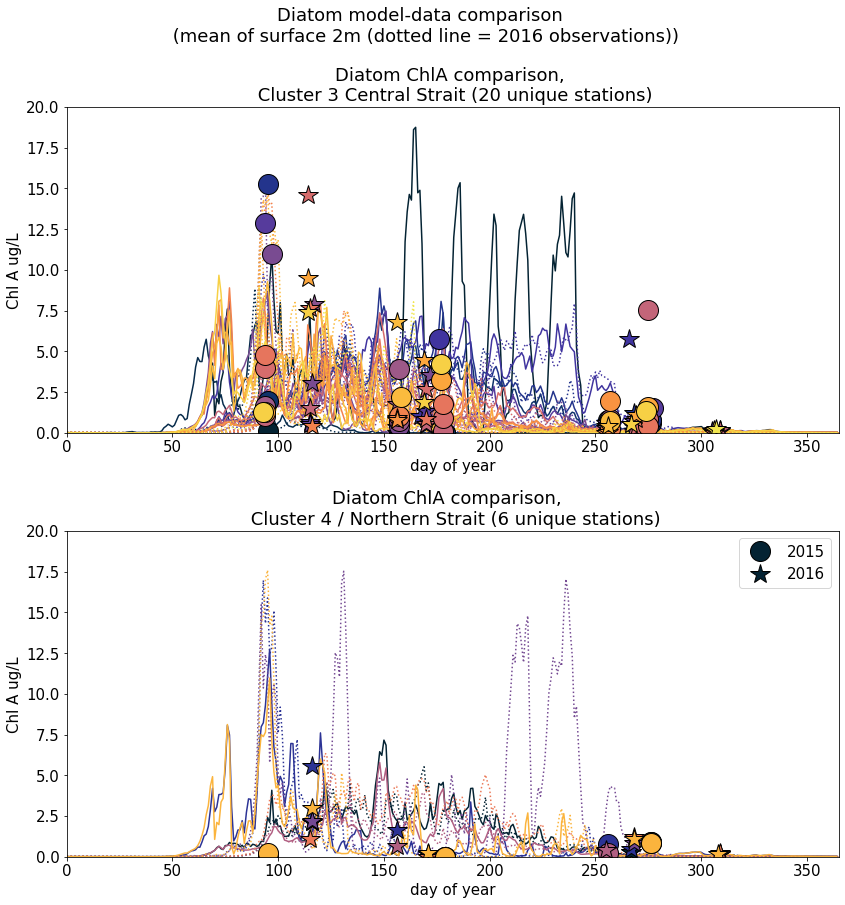

In [84]:
cl4_stns
fact = 0.8
print(len(cl4_stns))
cl3_u = (np.unique(cl3_stns))
[]
ms = 20
# cl3_stns
# print(len(cl3_stns))
cl4_u = ((np.unique(cl4_stns)))

fig = plt.figure(figsize=(15*fact, 15*fact))

ax1 = plt.subplot2grid((2,1), (0,0), colspan=1, rowspan=1) 
ax1.set_title(f'Diatom ChlA comparison, \n Cluster 3 Central Strait ({len(cl3_u)} unique stations)')

for i in range(0,len(cl3_u)):
    tstn = cl3_u[i]

    
    #plot individual stations
    subs_year = np.unique(cl3_year[cl3_stns == tstn])
    for y in range(0,len(subs_year)):
        td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{subs_year[y]}/BIO_TS/stn_{tstn}_DP_sp10.nc')
        if subs_year[y] == 2016:
            noday = 366; tlinestyle = ':'
        else:
            noday = 365; tlinestyle = '-'
        ax1.plot(np.arange(0,noday,1),np.nanmean(td['PHY'][:,0:2],axis = 1)*1.8, linestyle= tlinestyle, color = cmap(i/len(cl3_u)))
        tot = np.nanmean(td['PHY'][:,0:2],axis = 1)*1.8
#         print(tstn)
#         print(tot[tot>16.5])       
        
    #plot the obs
for i in range(0,len(cl3_u)):
    tstn = cl3_u[i]
    
    subs_yd = cl3_yd[(cl3_stns == tstn) & (cl3_year == 2015)]
    subs_diat = cl3_diat[(cl3_stns == tstn) & (cl3_year == 2015)]
    ax1.plot(subs_yd,subs_diat, marker = 'o', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl3_u)))
    subs_yd = cl3_yd[(cl3_stns == tstn) & (cl3_year == 2016)]
    subs_diat = cl3_diat[(cl3_stns == tstn) & (cl3_year == 2016)]
    ax1.plot(subs_yd,subs_diat, marker = '*', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl3_u)))  
ax1.set_xlabel('day of year'); ax1.set_xlim([0,365]); ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,20])



print('no')
ax1 = plt.subplot2grid((2,1), (1,0), colspan=1, rowspan=1) 
ax1.set_title(f'Diatom ChlA comparison,  \n Cluster 4 / Northern Strait ({len(cl4_u)} unique stations)')
for i in range(0,len(cl4_u)):
    tstn = cl4_u[i]

    #plot individual stations
    subs_year = np.unique(cl4_year[cl4_stns == tstn])
    for y in range(0,len(subs_year)):
        td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{subs_year[y]}/BIO_TS/stn_{tstn}_DP_sp10.nc')
        if subs_year[y] == 2016:
            noday = 366; tlinestyle = ':'
        else:
            noday = 365; tlinestyle = '-'
        ax1.plot(np.arange(0,noday,1),np.nanmean(td['PHY'][:,0:2],axis = 1)*1.8, linestyle= tlinestyle, color = cmap(i/len(cl4_u)))
        tot = np.nanmean(td['PHY'][:,0:2],axis = 1)*1.8
#         print(tstn)
#         print(tot[tot>16])
        
for i in range(0,1):#len(cl4_u)):
    tstn = cl4_u[i]
    
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2015)]
    subs_diat = cl4_diat[(cl4_stns == tstn) & (cl4_year == 2015)]
    ax1.plot(subs_yd,subs_diat, marker = 'o', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)),label = '2015')
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2016)]
    subs_diat = cl4_diat[(cl4_stns == tstn) & (cl4_year == 2016)]
    ax1.plot(subs_yd,subs_diat, marker = '*', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)),label = '2016')
for i in range(0,len(cl4_u)):
    tstn = cl4_u[i]
    
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2015)]
    subs_diat = cl4_diat[(cl4_stns == tstn) & (cl4_year == 2015)]
    ax1.plot(subs_yd,subs_diat, marker = 'o', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)))
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2016)]
    subs_diat = cl4_diat[(cl4_stns == tstn) & (cl4_year == 2016)]
    ax1.plot(subs_yd,subs_diat, marker = '*', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)))
plt.legend()
ax1.set_xlabel('day of year'); ax1.set_xlim([0,365]); ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,20])
plt.suptitle('Diatom model-data comparison \n (mean of surface 2m (dotted line = 2016 observations))', y = 1.05)
plt.tight_layout()

## the mystery of spiky station - station 121 - clusters as 4 in 2016, 3 in 2015

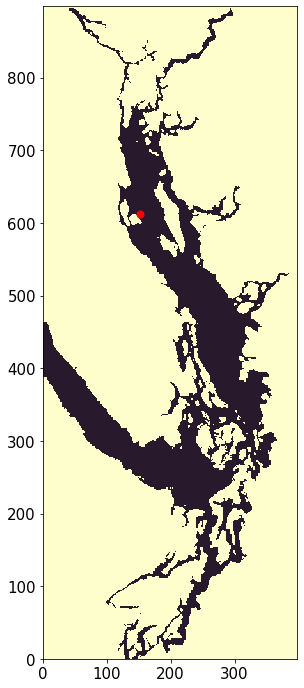

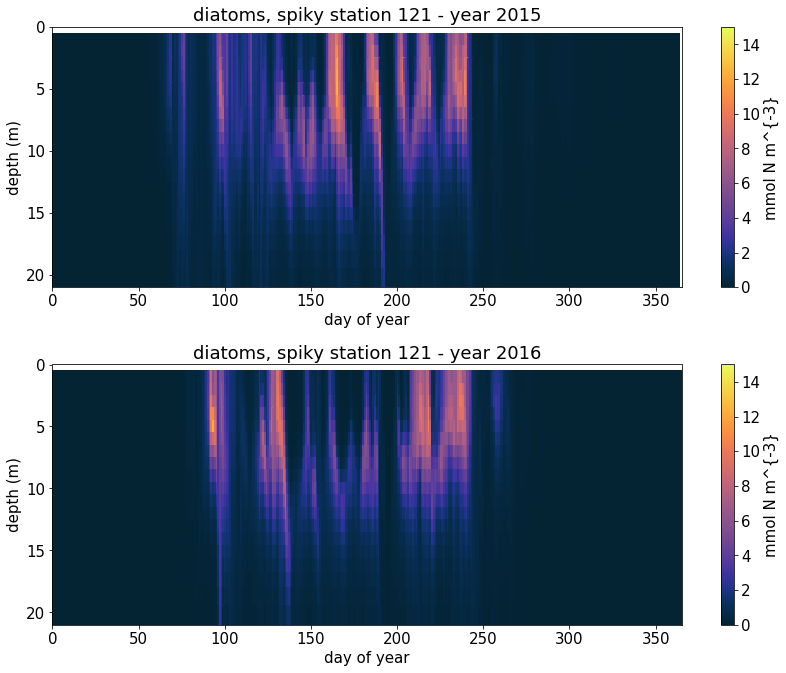

In [85]:
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid.fmask[0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
pts = ax1.scatter(xs[121],ys[121],s=50,c='red', marker='o')


tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
zlevels = tmesh['gdept_1d'][:]

tstn = 121
fig = plt.figure(figsize=(15*fact, 12*fact))
ax = plt.subplot2grid((2,4), (0,0), colspan=4, rowspan=1) 
td = nc.Dataset\
(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2015/BIO_TS/stn_{tstn}_DP_sp10.nc')
tplt2 = (td['PHY'][:,:])
tplt = np.transpose(tplt2)
# tplt = Frihar_oms 
tcmap = cm.cm.thermal
cmap = tcmap
section_slice = np.arange(0,365)
mesh = ax.pcolormesh(section_slice[:],zlevels[0],tplt, cmap = tcmap, vmin=0.0, vmax=15 )
ax.set_title('diatoms, spiky station 121 - year 2015')
ax.set_xlim([0,365])
ax.set_ylim([0,21])
ax.set_xlabel('day of year')
ax.set_ylabel('depth (m)')
ax.invert_yaxis()
cbar = plt.colorbar(mesh)
cbar.set_label(label='mmol N m^{-3}')
    
ax = plt.subplot2grid((2,4), (1,0), colspan=4, rowspan=1) 
td = nc.Dataset\
(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2016/BIO_TS/stn_{tstn}_DP_sp10.nc')
tplt2 = (td['PHY'][:,:])
tplt = np.transpose(tplt2)
# tplt = Frihar_oms 
tcmap = cm.cm.thermal
cmap = tcmap
section_slice = np.arange(0,366)
mesh = ax.pcolormesh(section_slice[:],zlevels[0],tplt, cmap = tcmap, vmin=0.0, vmax=15 )
ax.set_title('diatoms, spiky station 121 - year 2016')
ax.set_xlim([0,365])
ax.set_ylim([0,21])
ax.set_xlabel('day of year')
ax.set_ylabel('depth (m)')
ax.invert_yaxis()
cbar = plt.colorbar(mesh)
cbar.set_label(label='mmol N m^{-3}')
plt.tight_layout()

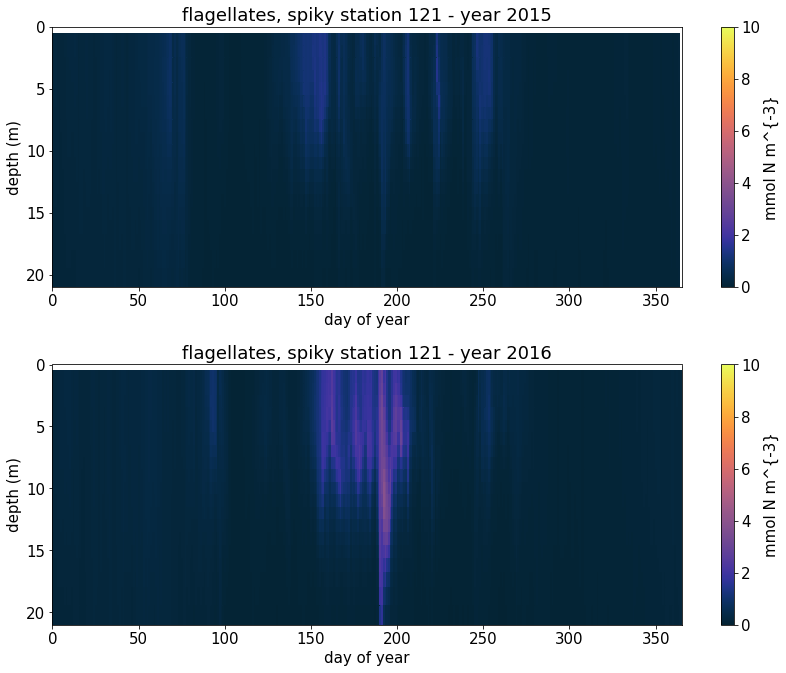

In [86]:
tstn = 121
fig = plt.figure(figsize=(15*fact, 12*fact))
ax = plt.subplot2grid((2,4), (0,0), colspan=4, rowspan=1) 
td = nc.Dataset\
(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2015/BIO_TS/stn_{tstn}_DP_sp10.nc')
tplt2 = (td['PHY2'][:,:])
tplt = np.transpose(tplt2)
# tplt = Frihar_oms 
tcmap = cm.cm.thermal
cmap = tcmap
section_slice = np.arange(0,365)
mesh = ax.pcolormesh(section_slice[:],zlevels[0],tplt, cmap = tcmap, vmin=0.0, vmax=10 )
ax.set_title('flagellates, spiky station 121 - year 2015')
ax.set_xlim([0,365])
ax.set_ylim([0,21])
ax.set_xlabel('day of year')
ax.set_ylabel('depth (m)')
ax.invert_yaxis()
cbar = plt.colorbar(mesh)
cbar.set_label(label='mmol N m^{-3}')
    
ax = plt.subplot2grid((2,4), (1,0), colspan=4, rowspan=1) 
td = nc.Dataset\
(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2016/BIO_TS/stn_{tstn}_DP_sp10.nc')
tplt2 = (td['PHY2'][:,:])
tplt = np.transpose(tplt2)
# tplt = Frihar_oms 
tcmap = cm.cm.thermal
cmap = tcmap
section_slice = np.arange(0,366)
mesh = ax.pcolormesh(section_slice[:],zlevels[0],tplt, cmap = tcmap, vmin=0.0, vmax=10 )
ax.set_title('flagellates, spiky station 121 - year 2016')
ax.set_xlim([0,365])
ax.set_ylim([0,21])
ax.set_xlabel('day of year')
ax.set_ylabel('depth (m)')
ax.invert_yaxis()
cbar = plt.colorbar(mesh)
cbar.set_label(label='mmol N m^{-3}')
plt.tight_layout()

35


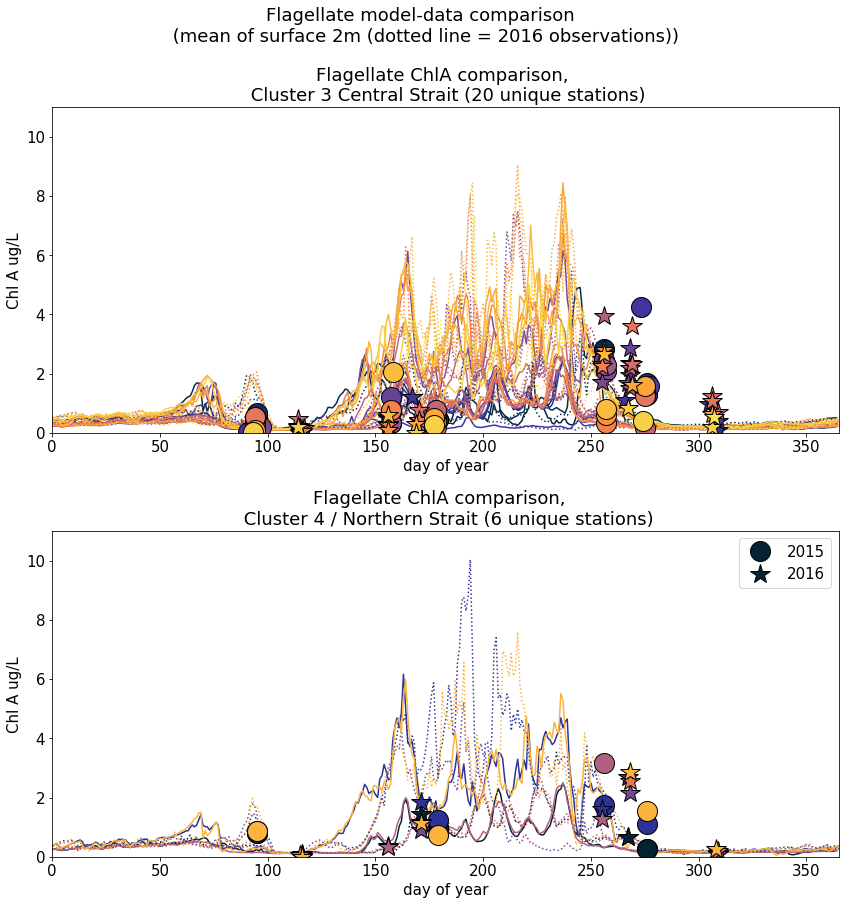

In [87]:
cl4_stns
print(len(cl4_stns))
cl3_u = (np.unique(cl3_stns))
[]
# cl3_stns
# print(len(cl3_stns))
cl4_u = ((np.unique(cl4_stns)))

fig = plt.figure(figsize=(15*fact, 15*fact))

ax1 = plt.subplot2grid((2,1), (0,0), colspan=1, rowspan=1) 
ax1.set_title(f'Flagellate ChlA comparison, \n Cluster 3 Central Strait ({len(cl3_u)} unique stations)')

for i in range(0,len(cl3_u)):
    tstn = cl3_u[i]

    
    #plot individual stations
    subs_year = np.unique(cl3_year[cl3_stns == tstn])
    for y in range(0,len(subs_year)):
        td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{subs_year[y]}/BIO_TS/stn_{tstn}_DP_sp10.nc')
        if subs_year[y] == 2016:
            noday = 366; tlinestyle = ':'
        else:
            noday = 365; tlinestyle = '-'
        ax1.plot(np.arange(0,noday,1),np.nanmean(td['PHY2'][:,0:2],axis = 1)*1.8, linestyle= tlinestyle, color = cmap(i/len(cl3_u)))
        
        
    #plot the obs
for i in range(0,len(cl3_u)):
    tstn = cl3_u[i]
    
    subs_yd = cl3_yd[(cl3_stns == tstn) & (cl3_year == 2015)]
    subs_flag = cl3_flag[(cl3_stns == tstn) & (cl3_year == 2015)]
    ax1.plot(subs_yd,subs_flag, marker = 'o', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl3_u)))
    subs_yd = cl3_yd[(cl3_stns == tstn) & (cl3_year == 2016)]
    subs_flag = cl3_flag[(cl3_stns == tstn) & (cl3_year == 2016)]
    ax1.plot(subs_yd,subs_flag, marker = '*', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl3_u)))  
ax1.set_xlabel('day of year'); ax1.set_xlim([0,365]); ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,11])

ax1 = plt.subplot2grid((2,1), (1,0), colspan=1, rowspan=1) 
ax1.set_title(f'Flagellate ChlA comparison,  \n Cluster 4 / Northern Strait ({len(cl4_u)} unique stations)')
for i in range(0,len(cl4_u)):
    tstn = cl4_u[i]

    #plot individual stations
    subs_year = np.unique(cl4_year[cl4_stns == tstn])
    for y in range(0,len(subs_year)):
        td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{subs_year[y]}/BIO_TS/stn_{tstn}_DP_sp10.nc')
        if subs_year[y] == 2016:
            noday = 366; tlinestyle = ':'
        else:
            noday = 365; tlinestyle = '-'
        ax1.plot(np.arange(0,noday,1),np.nanmean(td['PHY2'][:,0:2],axis = 1)*1.8, linestyle= tlinestyle, color = cmap(i/len(cl4_u)))
        
for i in range(0,1):#len(cl4_u)):
    tstn = cl4_u[i]
    
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2015)]
    subs_flag = cl4_flag[(cl4_stns == tstn) & (cl4_year == 2015)]
    ax1.plot(subs_yd,subs_flag, marker = 'o', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)),label = '2015')
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2016)]
    subs_flag = cl4_flag[(cl4_stns == tstn) & (cl4_year == 2016)]
    ax1.plot(subs_yd,subs_flag, marker = '*', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)),label = '2016')
for i in range(0,len(cl4_u)):
    tstn = cl4_u[i]
    
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2015)]
    subs_flag = cl4_flag[(cl4_stns == tstn) & (cl4_year == 2015)]
    ax1.plot(subs_yd,subs_flag, marker = 'o', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)))
    subs_yd = cl4_yd[(cl4_stns == tstn) & (cl4_year == 2016)]
    subs_flag = cl4_flag[(cl4_stns == tstn) & (cl4_year == 2016)]
    ax1.plot(subs_yd,subs_flag, marker = '*', linestyle = '',\
             markersize = ms, markeredgecolor = 'k', color = cmap(i/len(cl4_u)))
plt.legend()
ax1.set_xlabel('day of year'); ax1.set_xlim([0,365]); ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,11])
plt.suptitle('Flagellate model-data comparison \n (mean of surface 2m (dotted line = 2016 observations))', y = 1.05)
plt.tight_layout()

In [88]:
# fact = 0.9
# fig = plt.figure(figsize=(15*fact, 20*fact))
# ms = 20

# cmap = cm.cm.thermal
# print(np.shape(cmap))

# for r in range(1,5):
#     ax1 = plt.subplot2grid((5,2), (r-1,0), colspan=1, rowspan=1) 

#     for i in range((r-1)*20,r*20):
#         stn_id = np.where((xs==round2(cl3_i[i])) & (ys==round2(cl3_j[i])))
#         stn = (stn_id[0][0])
#         yr = cl3_year[i]
#         k = cl3_k[i]
#         if yr == 2016:
#             noday = 366
#         if yr == 2015:
#             noday = 365
#         td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{yr}/BIO_TS/stn_{stn}_DP_sp10.nc')
#         ax1.plot(np.arange(0,noday,1),td['PHY'][:,k]*1.8, color = cmap((i-((r-1)*20))/20))

#         ax1.plot(cl3_yd[i],cl3_diat[i], marker = 'o', markersize = ms, markeredgecolor = 'k',\
#                  color = cmap((i-((r-1)*20))/20))
    
#         if r == 1:
#             ax1.set_title('Diatom model-obs comparison')
#         ax1.set_xlabel('day of year'); ax1.set_xlim([0,365])
#         ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,25])
        
# for r in range(1,5):
#     ax1 = plt.subplot2grid((5,2), (r-1,1), colspan=1, rowspan=1) 

#     for i in range((r-1)*20,r*20):
#         stn_id = np.where((xs==round2(cl3_i[i])) & (ys==round2(cl3_j[i])))
#         stn = (stn_id[0][0])
#         yr = cl3_year[i]
#         k = cl3_k[i]
#         if yr == 2016:
#             noday = 366
#         if yr == 2015:
#             noday = 365
#         td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{yr}/BIO_TS/stn_{stn}_DP_sp10.nc')
#         ax1.plot(np.arange(0,noday,1),td['PHY2'][:,k]*1.8, color = cmap((i-((r-1)*20))/20))

#         ax1.plot(cl3_yd[i],cl3_flag[i], marker = 'o', markersize = ms, markeredgecolor = 'k',\
#                  color = cmap((i-((r-1)*20))/20))
#         if r == 1:
#             ax1.set_title('Flagellate model-obs comparison')
#         ax1.set_xlabel('day of year'); ax1.set_xlim([0,365])
#         ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,11])
        
# plt.suptitle('Cluster 3 (separated with 20 obs. per plot to avoid overwhelming plot)', y = 0.90)

In [89]:
# fact = 0.9
# fig = plt.figure(figsize=(15*fact, 20*fact))
# ms = 20

# cmap = cm.cm.thermal
# print(np.shape(cmap))

# for r in range(1,5):
#     ax1 = plt.subplot2grid((5,2), (r-1,0), colspan=1, rowspan=1) 

#     for i in range((r-1)*10,min(r*10,35)):
#         stn_id = np.where((xs==round2(cl4_i[i])) & (ys==round2(cl4_j[i])))
#         stn = (stn_id[0][0])
#         yr = cl4_year[i]
#         k = cl4_k[i]
#         if yr == 2016:
#             noday = 366
#         if yr == 2015:
#             noday = 365
#         td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{yr}/BIO_TS/stn_{stn}_DP_sp10.nc')
#         ax1.plot(np.arange(0,noday,1),td['PHY'][:,k]*1.8, color = cmap((i-((r-1)*10))/10))

#         ax1.plot(cl4_yd[i],cl4_diat[i], marker = 'o', markersize = ms, markeredgecolor = 'k',\
#                  color = cmap((i-((r-1)*10))/10))
    
#         if r == 1:
#             ax1.set_title('Diatom model-obs comparison')
#         ax1.set_xlabel('day of year'); ax1.set_xlim([0,365])
#         ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,25])
        
# for r in range(1,5):
#     ax1 = plt.subplot2grid((5,2), (r-1,1), colspan=1, rowspan=1) 

#     for i in range((r-1)*10,min(r*10,35)):
#         stn_id = np.where((xs==round2(cl4_i[i])) & (ys==round2(cl4_j[i])))
#         stn = (stn_id[0][0])
#         yr = cl4_year[i]
#         k = cl4_k[i]
#         if yr == 2016:
#             noday = 366
#         if yr == 2015:
#             noday = 365
#         td = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/{yr}/BIO_TS/stn_{stn}_DP_sp10.nc')
#         ax1.plot(np.arange(0,noday,1),td['PHY2'][:,k]*1.8, color = cmap((i-((r-1)*10))/10))

#         ax1.plot(cl4_yd[i],cl4_flag[i], marker = 'o', markersize = ms, markeredgecolor = 'k',\
#                  color = cmap((i-((r-1)*10))/10))
#         if r == 1:
#             ax1.set_title('Flagellate model-obs comparison')
#         ax1.set_xlabel('day of year'); ax1.set_xlim([0,365])
#         ax1.set_ylabel('Chl A ug/L'); ax1.set_ylim([0,11])
        
# plt.suptitle('Cluster 4 (separated with 10 obs. per plot to avoid overwhelming plot)', y = 0.92)

# Understanding mean depth profiles of different biological clusters

We know that the 201905 SSC shows that the red (northern Salish Sea) cluster tends to have higher biomass, especially in summer, than the central strait. At the same time, both model and observations (HPLC, satellite) report lower surface productivity. We ask:

#### Is the higher biomass reported in the north due to 

In [90]:

grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
print(depths)

[  0.50000027   1.50000314   2.5000115    3.50003055   4.50007042
   5.50015083   6.50031022   7.50062342   8.50123623   9.50243254
  10.5047653   11.50931127  12.51816684  13.53541212  14.56898216
  15.63428737  16.76117342  18.00713456  19.48178514  21.38997868
  24.10025665  28.22991514  34.68575798  44.51772486  58.48433368
  76.58558445  98.06295924 121.8665184  147.08945807 173.11448217
 199.57304923 226.26030574 253.06663733 279.93454976 306.83419736
 333.75016973 360.6745318  387.60320347 414.53408835 441.46610968]


In [91]:
cl_2013 = pickle.load(open('./pkls/bio_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/bio_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/bio_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/bio_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/bio_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/bio_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/bio_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/bio_datamat_2016.pkl', 'rb'))

cldes_2013_reass = pickle.load(open('./pkls/BIO_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass = pickle.load(open('./pkls/BIO_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass = pickle.load(open('./pkls/BIO_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass = pickle.load(open('./pkls/BIO_clno_5_2016_reass.pkl', 'rb'))

colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']


In [92]:
def cluster_patterns_mean_BIO(orig_data,cluster_des,cluster_no,noday):
    import numpy as np
    
    '''For a given data matrix (S stations X 365 daily signals), list of clusters designation (S stations), 
    and specific cluster, return an C_S x 365 matrix of the C_S annual signals in that cluster
    for the C_S stations in the cluster'''
    #which stations are in the cluster we are looking for?
    where_cluster = np.where(cluster_des == cluster_no)
    where_cluster = np.squeeze(where_cluster)
    
    no_stns_in_cluster = where_cluster.size
    if no_stns_in_cluster == 1:
        this_stn = np.squeeze(where_cluster)
        where_cluster = this_stn
        signalmat = orig_data[this_stn,:]
        mean_signal = signalmat
    else:    
        signalmat = np.zeros([no_stns_in_cluster,noday*3])

        for stn in range(0,no_stns_in_cluster):
            this_stn = where_cluster[stn]
            signalmat[stn,:] = orig_data[this_stn,:]
        mean_signal = np.nanmean(signalmat, axis = 0)
    return mean_signal

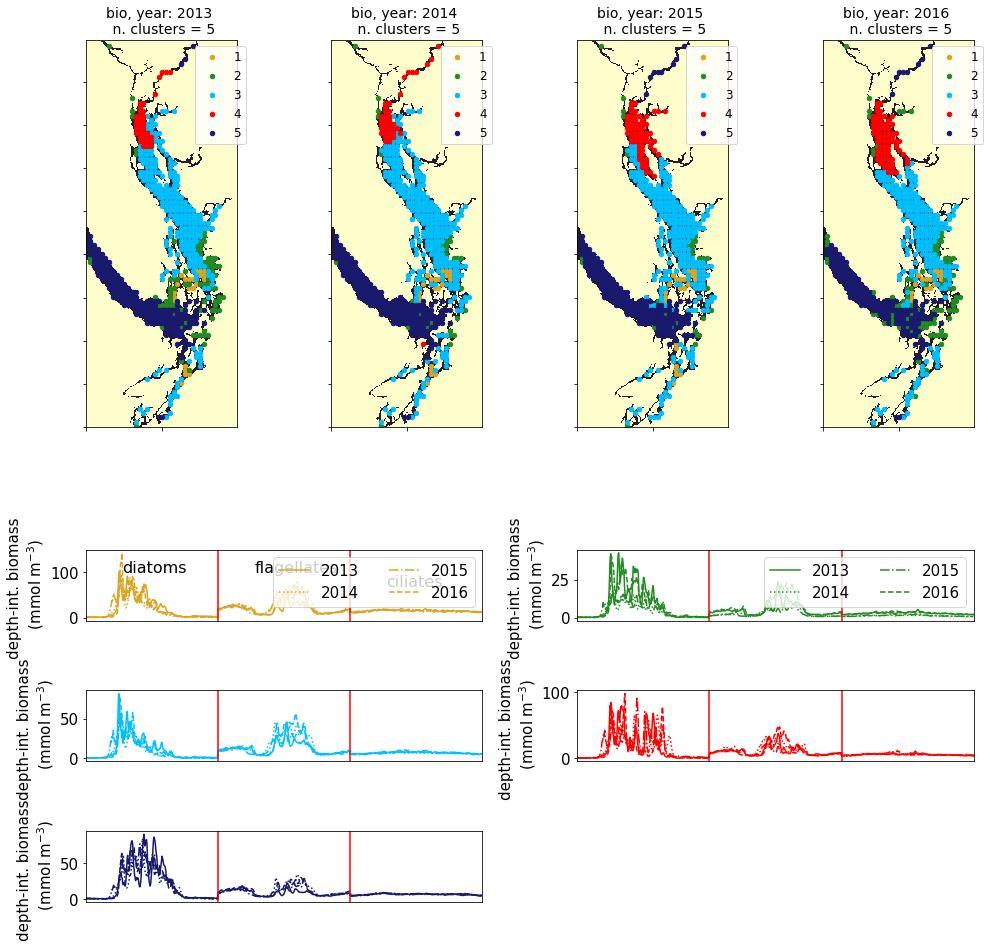

In [93]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']



fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','bio',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','bio',5,cldes_2014_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','bio',5,cldes_2015_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','bio',5,cldes_2016_reass, colors)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
#ax1.set_ylim([0,125])
ax1.set_ylabel('depth-int. biomass \n (mmol m$^{-3}$)')
ax1.legend(loc = 'best', ncol = 2)
ax1.set_xticks([]); ax1.set_xlim([0,365*3])
ax1.axvline(x=365,color = 'r'); ax1.axvline(x=365*2,color = 'r')
ax1.text(100,100,'diatoms',fontsize = 16)
ax1.text(100+365,100,'flagellates',fontsize = 16)
ax1.text(100+365*2,70,'ciliates',fontsize = 16)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylabel('depth-int. biomass \n (mmol m$^{-3}$)')
ax1.set_xticks([]); ax1.set_xlim([0,365*3])
ax1.axvline(x=365,color = 'r'); ax1.axvline(x=365*2,color = 'r')

ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylabel('depth-int. biomass \n (mmol m$^{-3}$)')
ax1.set_xticks([]); ax1.set_xlim([0,365*3])
ax1.axvline(x=365,color = 'r'); ax1.axvline(x=365*2,color = 'r')


ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylabel('depth-int. biomass \n (mmol m$^{-3}$)')
ax1.set_xticks([]); ax1.set_xlim([0,365*3])
ax1.axvline(x=365,color = 'r'); ax1.axvline(x=365*2,color = 'r')

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = cluster_patterns_mean_BIO(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i]*3,1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365*3])
ax1.set_ylabel('depth-int. biomass \n (mmol m$^{-3}$)')
ax1.set_xticks([]); ax1.set_xlim([0,365*3])
ax1.axvline(x=365,color = 'r'); ax1.axvline(x=365*2,color = 'r')

    
plt.tight_layout()






## Mean depth profiles by functional group - year 2013, 2014

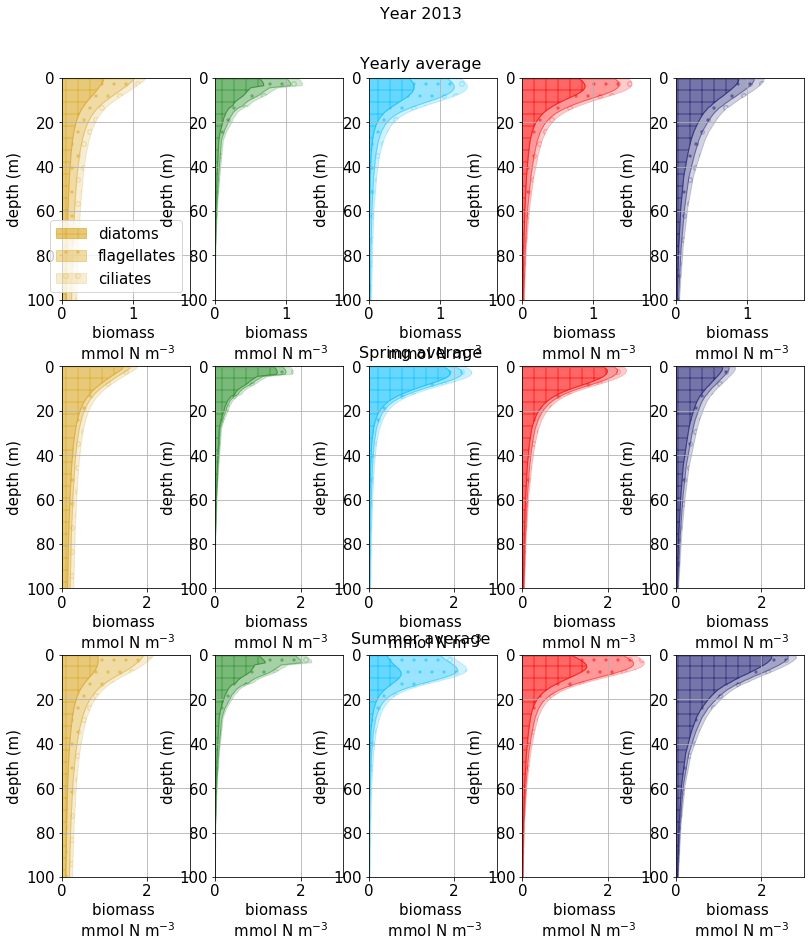

In [94]:



spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
aut_st = 243; aut_e = 334;

fact = 0.7
fig = plt.figure(figsize=(19*fact, 7*3*fact))

clsigs = [BIO_cl_1_sig_2013,BIO_cl_2_sig_2013,BIO_cl_3_sig_2013,\
          BIO_cl_4_sig_2013,BIO_cl_5_sig_2013]

for i in range(1,6):
    tcolor = colors[i]
    ax1 = plt.subplot2grid((3,5), (0,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,:,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,:,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,:,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    if i == 1:
        ax1.legend(loc = 'lower right')
    ax1.set_ylim([0,100])
    ax1.invert_yaxis()
    ax1.set_xlim([0,1.8])
    ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')

    ax1.grid()
plt.suptitle('Yearly average', y = .90, fontsize = 16)  
plt.figtext(0.5, 0.94, 'Year 2013', fontsize = 16, ha='center', va='center')
# Adjust vertical_spacing = 0.5 * axes_height
plt.subplots_adjust(hspace=0.3)

# Add text in figure coordinates
plt.figtext(0.5, 0.62, 'Spring average', fontsize = 16, ha='center', va='center')
for i in range(1,6):
    tcolor = colors[i]
    ax1 = plt.subplot2grid((3,5), (1,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    ax1.set_ylim([0,100]), ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')
    ax1.invert_yaxis()
    ax1.set_xlim([0,3])
    ax1.grid()
    
plt.figtext(0.5, 0.35, 'Summer average', fontsize = 16, ha='center', va='center')
for i in range(1,6):
    tcolor = colors[i]    
    ax1 = plt.subplot2grid((3,5), (2,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    ax1.set_ylim([0,100])
    ax1.set_xlim([0,3])
    ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')
    ax1.invert_yaxis()
    ax1.grid()

#plt.suptitle('Year 2013')

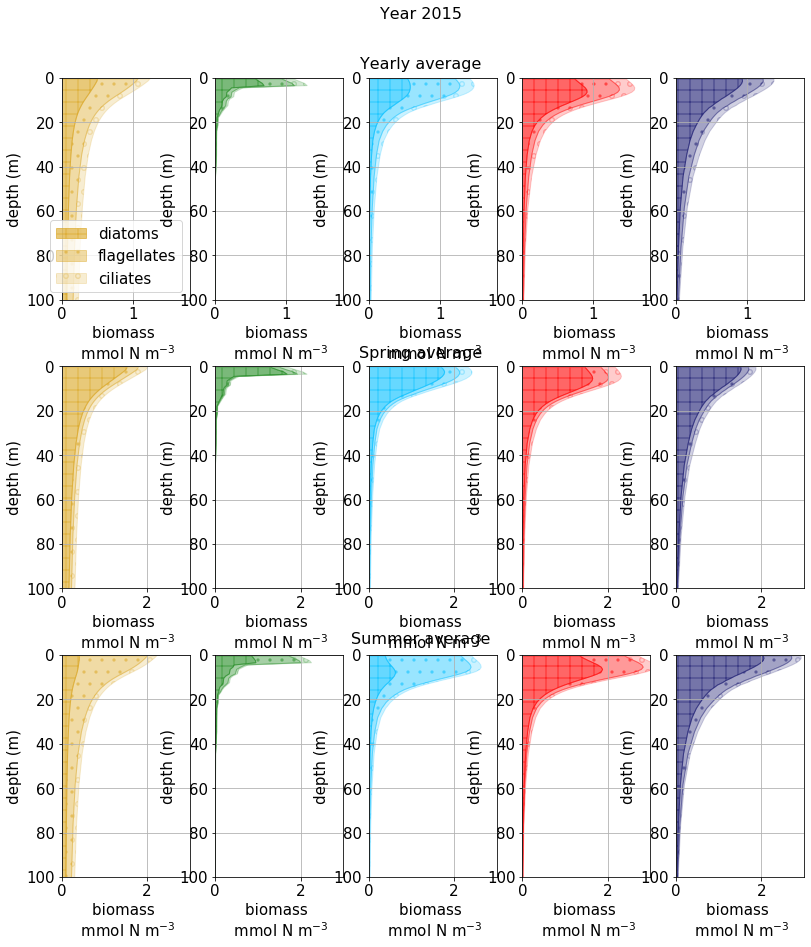

In [95]:



spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
aut_st = 243; aut_e = 334;

fact = 0.7
fig = plt.figure(figsize=(19*fact, 7*3*fact))

clsigs = [BIO_cl_1_sig_2015,BIO_cl_2_sig_2015,BIO_cl_3_sig_2015,\
          BIO_cl_4_sig_2015,BIO_cl_5_sig_2015]

for i in range(1,6):
    tcolor = colors[i]
    ax1 = plt.subplot2grid((3,5), (0,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,:,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,:,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,:,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    if i == 1:
        ax1.legend(loc = 'lower right')
    ax1.set_ylim([0,100])
    ax1.invert_yaxis()
    ax1.set_xlim([0,1.8])
    ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')

    ax1.grid()
plt.suptitle('Yearly average', y = .90, fontsize = 16)  
plt.figtext(0.5, 0.94, 'Year 2015', fontsize = 16, ha='center', va='center')
# Adjust vertical_spacing = 0.5 * axes_height
plt.subplots_adjust(hspace=0.3)

# Add text in figure coordinates
plt.figtext(0.5, 0.62, 'Spring average', fontsize = 16, ha='center', va='center')
for i in range(1,6):
    tcolor = colors[i]
    ax1 = plt.subplot2grid((3,5), (1,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    ax1.set_ylim([0,100]), ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')
    ax1.invert_yaxis()
    ax1.set_xlim([0,3])
    ax1.grid()
    
plt.figtext(0.5, 0.35, 'Summer average', fontsize = 16, ha='center', va='center')
for i in range(1,6):
    tcolor = colors[i]    
    ax1 = plt.subplot2grid((3,5), (2,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    ax1.set_ylim([0,100])
    ax1.set_xlim([0,3])
    ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')
    ax1.invert_yaxis()
    ax1.grid()

#plt.suptitle('Year 2015')

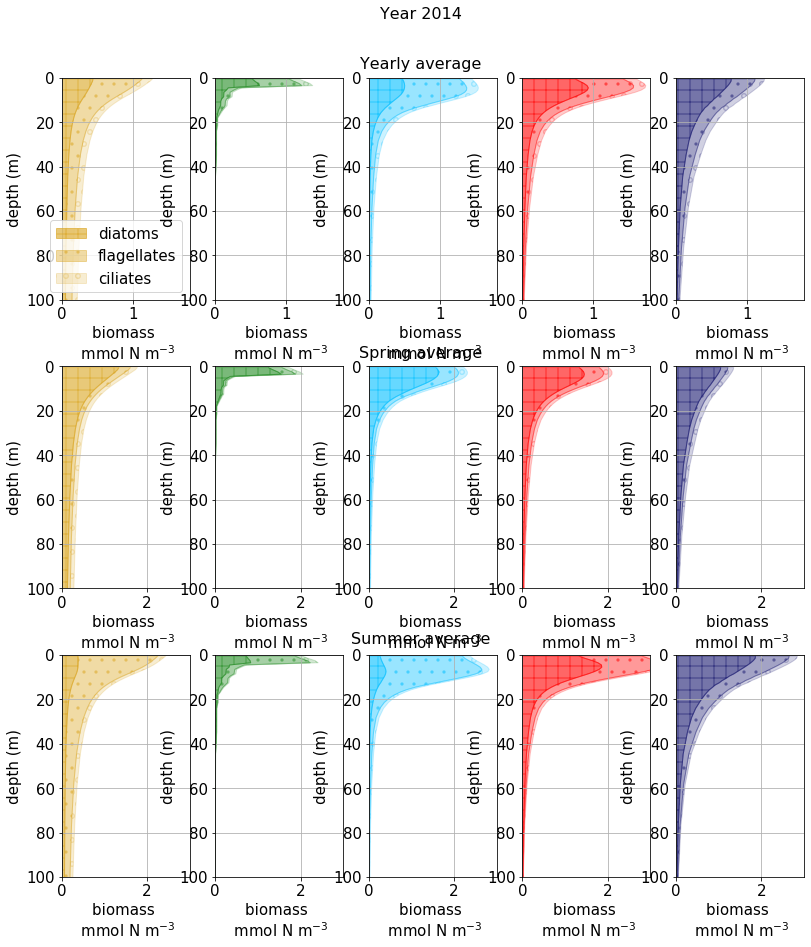

In [96]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']


spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
aut_st = 243; aut_e = 334;

fact = 0.7
fig = plt.figure(figsize=(19*fact, 7*3*fact))

clsigs = [BIO_cl_1_sig_2014,BIO_cl_2_sig_2014,BIO_cl_3_sig_2014,\
          BIO_cl_4_sig_2014,BIO_cl_5_sig_2014]

for i in range(1,6):
    tcolor = colors[i]
    ax1 = plt.subplot2grid((3,5), (0,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,:,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,:,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,:,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    if i == 1:
        ax1.legend(loc = 'lower right')
    ax1.set_ylim([0,100])
    ax1.invert_yaxis()
    ax1.set_xlim([0,1.8])
    ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')

    ax1.grid()
plt.suptitle('Yearly average', y = .90, fontsize = 16)  
plt.figtext(0.5, 0.94, 'Year 2014', fontsize = 16, ha='center', va='center')
# Adjust vertical_spacing = 0.5 * axes_height
plt.subplots_adjust(hspace=0.3)

# Add text in figure coordinates
plt.figtext(0.5, 0.62, 'Spring average', fontsize = 16, ha='center', va='center')
for i in range(1,6):
    tcolor = colors[i]
    ax1 = plt.subplot2grid((3,5), (1,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,spr_st:spr_e,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    ax1.set_ylim([0,100]), ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')
    ax1.invert_yaxis()
    ax1.set_xlim([0,3])
    ax1.grid()
    
plt.figtext(0.5, 0.35, 'Summer average', fontsize = 16, ha='center', va='center')
for i in range(1,6):
    tcolor = colors[i]    
    ax1 = plt.subplot2grid((3,5), (2,i-1), colspan=1, rowspan=1) 
    tcl = clsigs[i-1]
    tcl_diat = np.nanmean(np.mean(tcl[:,0,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_flag = np.nanmean(np.mean(tcl[:,1,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_cili = np.nanmean(np.mean(tcl[:,2,sum_st:sum_e,:],axis = 0),axis=0)
    tcl_tot = np.nansum(tcl,axis = 1)
    
    tcl_tot_mean = np.nanmean(np.nanmean(tcl_tot,axis = 0),axis=0)
    ax1.plot(tcl_diat,depths,linestyle = '-', linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,np.zeros_like(tcl_diat), tcl_diat, color = tcolor, alpha=0.6, hatch='+', label='diatoms')
    ax1.plot(tcl_flag+tcl_diat,depths,linestyle = ':',linewidth = 0, color = tcolor)
    ax1.fill_betweenx(depths,tcl_diat, tcl_flag+tcl_diat, color = tcolor, alpha=0.4, hatch='.', label='flagellates')
    ax1.plot(tcl_flag+tcl_diat+tcl_cili,depths,linestyle = '-.', linewidth = 0,color = tcolor)
    ax1.fill_betweenx(depths,tcl_flag+tcl_diat, tcl_flag+tcl_diat+tcl_cili, color = tcolor, alpha=0.2, hatch='o', label='ciliates')
    ax1.set_ylim([0,100])
    ax1.set_xlim([0,3])
    ax1.set_ylabel('depth (m)'), ax1.set_xlabel('biomass \n mmol N m$^{-3}$')
    ax1.invert_yaxis()
    ax1.grid()

#plt.suptitle('Year 2014')

## All 4 years - productivity by cluster (year-round, spring, summer)

Text(0.5, 0.98, 'Full-year averaged depth profile')

<Figure size 957.6x1058.4 with 0 Axes>

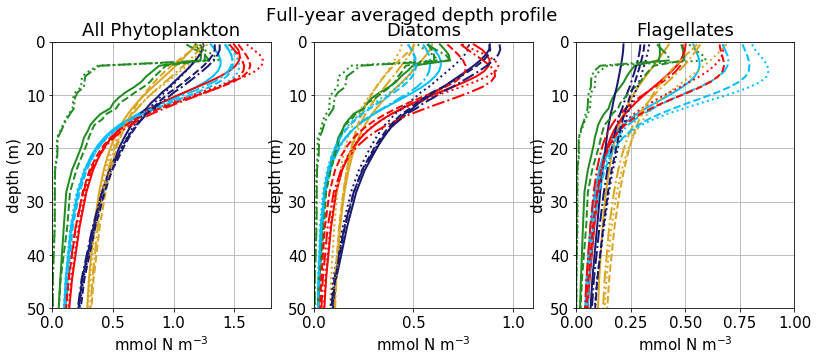

In [97]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
linestyl = ['-',':','-.','--']

fig = plt.figure(figsize=(19*fact, 7*3*fact))

clsigs_13 = [BIO_cl_1_sig_2013,BIO_cl_2_sig_2013,BIO_cl_3_sig_2013,\
          BIO_cl_4_sig_2013,BIO_cl_5_sig_2013]
clsigs_14 = [BIO_cl_1_sig_2014,BIO_cl_2_sig_2014,BIO_cl_3_sig_2014,\
          BIO_cl_4_sig_2014,BIO_cl_5_sig_2014]
clsigs_15 = [BIO_cl_1_sig_2015,BIO_cl_2_sig_2015,BIO_cl_3_sig_2015,\
          BIO_cl_4_sig_2015,BIO_cl_5_sig_2015]
clsigs_16 = [BIO_cl_1_sig_2016,BIO_cl_2_sig_2016,BIO_cl_3_sig_2016,\
          BIO_cl_4_sig_2016,BIO_cl_5_sig_2016]

fact = 0.7
fig = plt.figure(figsize=(19*fact, 7*fact))

ax1 = plt.subplot2grid((1,3), (0,0), colspan=1, rowspan=1) 

for c in range(0,len(clsigs_13)):
    tcl = clsigs_13[c]; totphyt = np.sum(tcl,axis = 1)
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-', linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = np.sum(tcl,axis = 1)
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = np.sum(tcl,axis = 1)
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = np.sum(tcl,axis = 1)
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,1.8])
ax1.invert_yaxis(); ax1.grid()
ax1.set_title('All Phytoplankton')
ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')
    
ax1 = plt.subplot2grid((1,3), (0,1), colspan=1, rowspan=1) 
for c in range(0,len(clsigs_13)):
    #diatoms
    tcl = clsigs_13[c]; totphyt = tcl[:,0,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = tcl[:,0,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = tcl[:,0,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = tcl[:,0,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,1.1])
ax1.invert_yaxis(); ax1.grid(); ax1.set_title('Diatoms')
ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')
    
ax1 = plt.subplot2grid((1,3), (0,2), colspan=1, rowspan=1) 
for c in range(0,len(clsigs_13)):
    #diatoms
    tcl = clsigs_13[c]; totphyt = tcl[:,1,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = tcl[:,1,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = tcl[:,1,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = tcl[:,1,:,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,1.0]); ax1.invert_yaxis(); ax1.grid()
ax1.set_title('Flagellates'); ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')

plt.suptitle('Full-year averaged depth profile')

Text(0.5, 0.98, 'Spring averaged depth profile')

<Figure size 957.6x1058.4 with 0 Axes>

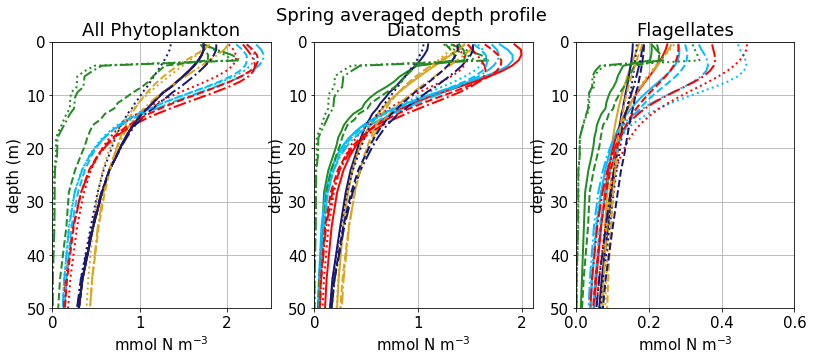

In [98]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
linestyl = ['-',':','-.','--']

fig = plt.figure(figsize=(19*fact, 7*3*fact))

clsigs_13 = [BIO_cl_1_sig_2013,BIO_cl_2_sig_2013,BIO_cl_3_sig_2013,\
          BIO_cl_4_sig_2013,BIO_cl_5_sig_2013]
clsigs_14 = [BIO_cl_1_sig_2014,BIO_cl_2_sig_2014,BIO_cl_3_sig_2014,\
          BIO_cl_4_sig_2014,BIO_cl_5_sig_2014]
clsigs_15 = [BIO_cl_1_sig_2015,BIO_cl_2_sig_2015,BIO_cl_3_sig_2015,\
          BIO_cl_4_sig_2015,BIO_cl_5_sig_2015]
clsigs_16 = [BIO_cl_1_sig_2016,BIO_cl_2_sig_2016,BIO_cl_3_sig_2016,\
          BIO_cl_4_sig_2016,BIO_cl_5_sig_2016]

fact = 0.7
fig = plt.figure(figsize=(19*fact, 7*fact))

ax1 = plt.subplot2grid((1,3), (0,0), colspan=1, rowspan=1) 

for c in range(0,len(clsigs_13)):
    tc = clsigs_13[c];
    totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-', linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,2.5])
ax1.invert_yaxis(); ax1.grid()
ax1.set_title('All Phytoplankton')
ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')
    
ax1 = plt.subplot2grid((1,3), (0,1), colspan=1, rowspan=1) 
for c in range(0,len(clsigs_13)):
    #diatoms
    tcl = clsigs_13[c]; totphyt = tcl[:,0,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = tcl[:,0,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = tcl[:,0,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = tcl[:,0,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,2.1])
ax1.invert_yaxis(); ax1.grid(); ax1.set_title('Diatoms')
ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')
    
ax1 = plt.subplot2grid((1,3), (0,2), colspan=1, rowspan=1) 
for c in range(0,len(clsigs_13)):
    #diatoms
    tcl = clsigs_13[c]; totphyt = tcl[:,1,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = tcl[:,1,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = tcl[:,1,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = tcl[:,1,spr_st:spr_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,0.6]); ax1.invert_yaxis(); ax1.grid()
ax1.set_title('Flagellates'); ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')

plt.suptitle('Spring averaged depth profile')

Text(0.5, 0.98, 'Summer averaged depth profile')

<Figure size 957.6x1058.4 with 0 Axes>

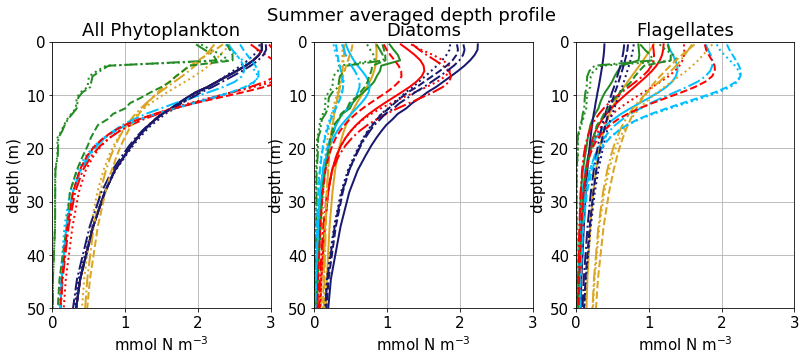

In [99]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
linestyl = ['-',':','-.','--']

fig = plt.figure(figsize=(19*fact, 7*3*fact))

clsigs_13 = [BIO_cl_1_sig_2013,BIO_cl_2_sig_2013,BIO_cl_3_sig_2013,\
          BIO_cl_4_sig_2013,BIO_cl_5_sig_2013]
clsigs_14 = [BIO_cl_1_sig_2014,BIO_cl_2_sig_2014,BIO_cl_3_sig_2014,\
          BIO_cl_4_sig_2014,BIO_cl_5_sig_2014]
clsigs_15 = [BIO_cl_1_sig_2015,BIO_cl_2_sig_2015,BIO_cl_3_sig_2015,\
          BIO_cl_4_sig_2015,BIO_cl_5_sig_2015]
clsigs_16 = [BIO_cl_1_sig_2016,BIO_cl_2_sig_2016,BIO_cl_3_sig_2016,\
          BIO_cl_4_sig_2016,BIO_cl_5_sig_2016]

fact = 0.7
fig = plt.figure(figsize=(19*fact, 7*fact))

ax1 = plt.subplot2grid((1,3), (0,0), colspan=1, rowspan=1) 

for c in range(0,len(clsigs_13)):
    tc = clsigs_13[c];
    totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-', linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = np.sum(tcl,axis = 1)
    totphyt = totphyt[:,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,3])
ax1.invert_yaxis(); ax1.grid()
ax1.set_title('All Phytoplankton')
ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')
    
ax1 = plt.subplot2grid((1,3), (0,1), colspan=1, rowspan=1) 
for c in range(0,len(clsigs_13)):
    #diatoms
    tcl = clsigs_13[c]; totphyt = tcl[:,0,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = tcl[:,0,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = tcl[:,0,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = tcl[:,0,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,3])
ax1.invert_yaxis(); ax1.grid(); ax1.set_title('Diatoms')
ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')
    
ax1 = plt.subplot2grid((1,3), (0,2), colspan=1, rowspan=1) 
for c in range(0,len(clsigs_13)):
    #diatoms
    tcl = clsigs_13[c]; totphyt = tcl[:,1,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_14)):
    tcl = clsigs_14[c]; totphyt = tcl[:,1,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = ':',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_15)):
    tcl = clsigs_15[c]; totphyt = tcl[:,1,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '-.',linewidth = 2, color = colors[c+1])
for c in range(0,len(clsigs_16)):
    tcl = clsigs_16[c]; totphyt = tcl[:,1,sum_st:sum_e,:]
    tcl_mean = np.nanmean(np.nanmean(totphyt,axis=0),axis=0)
    ax1.plot(tcl_mean,depths,linestyle = '--',linewidth = 2, color = colors[c+1])
    
ax1.set_ylim([0,50]); ax1.set_xlim([0,3]); ax1.invert_yaxis(); ax1.grid()
ax1.set_title('Flagellates'); ax1.set_xlabel('mmol N m$^{-3}$'); ax1.set_ylabel('depth (m)')

plt.suptitle('Summer averaged depth profile')

In [100]:
np.shape(BIO_cl_1_sig_2013)

(22, 3, 365, 40)

In [101]:
def add_subplot_border(ax, width=1, color=None ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)


## creating .pkls of depth profiles by clusters

####  second sts_cl_{xx}_sig_{201xx} is placeholder

In [102]:
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2013/BIO_TS/'

stns_cl_1_2013 = stn_ids_edgeout[BIO_cl_2013 == 1]
# stns_cl_1_2013 = [0,1]
BIO_cl_1_sig_2013 = np.zeros([len(stns_cl_1_2013),3,365,40])
for i in range(0,len(stns_cl_1_2013)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_1_2013[i]}_DP_sp10.nc')
    BIO_cl_1_sig_2013[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_1_sig_2013[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_1_sig_2013[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_1_sig_2013, open("./pkls/BIO_cl_1_sig_2013.pkl", 'wb'))

stns_cl_2_2013 = stn_ids_edgeout[BIO_cl_2013 == 2]
# stns_cl_2_2013 = [2,3]
BIO_cl_2_sig_2013 = np.zeros([len(stns_cl_2_2013),3,365,40])
for i in range(0,len(stns_cl_2_2013)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_2_2013[i]}_DP_sp10.nc')
    BIO_cl_2_sig_2013[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_2_sig_2013[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_2_sig_2013[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_2_sig_2013, open("./pkls/BIO_cl_2_sig_2013.pkl", 'wb'))

stns_cl_3_2013 = stn_ids_edgeout[BIO_cl_2013 == 3]
# stns_cl_3_2013 = [4,5]
BIO_cl_3_sig_2013 = np.zeros([len(stns_cl_3_2013),3,365,40])
for i in range(0,len(stns_cl_3_2013)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_3_2013[i]}_DP_sp10.nc')
    BIO_cl_3_sig_2013[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_3_sig_2013[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_3_sig_2013[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_3_sig_2013, open("./pkls/BIO_cl_3_sig_2013.pkl", 'wb'))

stns_cl_4_2013 = stn_ids_edgeout[BIO_cl_2013 == 4]
# stns_cl_4_2013 = [6,7]
BIO_cl_4_sig_2013 = np.zeros([len(stns_cl_4_2013),3,365,40])
for i in range(0,len(stns_cl_4_2013)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_4_2013[i]}_DP_sp10.nc')
    BIO_cl_4_sig_2013[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_4_sig_2013[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_4_sig_2013[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_4_sig_2013, open("./pkls/BIO_cl_4_sig_2013.pkl", 'wb'))

stns_cl_5_2013 = stn_ids_edgeout[BIO_cl_2013 == 5]
# stns_cl_5_2013 = [8,9]
BIO_cl_5_sig_2013 = np.zeros([len(stns_cl_5_2013),3,365,40])
for i in range(0,len(stns_cl_5_2013)):
    print(stns_cl_5_2013[i])
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_5_2013[i]}_DP_sp10.nc')
    BIO_cl_5_sig_2013[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_5_sig_2013[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_5_sig_2013[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_5_sig_2013, open("./pkls/BIO_cl_5_sig_2013.pkl", 'wb'))

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
89
90
91
92
93
94
103
104
105
106
124
125
126
146
147
148
149
150
151
168
169
170
171
172
173
192
193
194
195
196
197
213
215
216
217
218
220
230
232
233
234
235
251
252
253
254
255
256
257
278
279
280
281
282
283
310
311
312
313
314
316
343
344
345
346
347
348
349
350
351
352
374
375
376
378
379
380
396
400
401
402
403
405
406
407
408
425
429
430
431
432
433
454
455
473
477
478
479
480
481
525
526


In [103]:
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2014/BIO_TS/'
stns_cl_1_2014 = stn_ids_edgeout[BIO_cl_2014 == 1]
# stns_cl_1_2014 = [0,1]
BIO_cl_1_sig_2014 = np.zeros([len(stns_cl_1_2014),3,365,40])
for i in range(0,len(stns_cl_1_2014)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_1_2014[i]}_DP_sp10.nc')
    BIO_cl_1_sig_2014[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_1_sig_2014[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_1_sig_2014[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_1_sig_2014, open("./pkls/BIO_cl_1_sig_2014.pkl", 'wb'))

stns_cl_2_2014 = stn_ids_edgeout[BIO_cl_2014 == 2]
# stns_cl_2_2014 = [3,4]
BIO_cl_2_sig_2014 = np.zeros([len(stns_cl_2_2014),3,365,40])
for i in range(0,len(stns_cl_2_2014)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_2_2014[i]}_DP_sp10.nc')
    BIO_cl_2_sig_2014[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_2_sig_2014[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_2_sig_2014[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_2_sig_2014, open("./pkls/BIO_cl_2_sig_2014.pkl", 'wb'))

stns_cl_3_2014 = stn_ids_edgeout[BIO_cl_2014 == 3]
# stns_cl_3_2014 = [5,6]
BIO_cl_3_sig_2014 = np.zeros([len(stns_cl_3_2014),3,365,40])
for i in range(0,len(stns_cl_3_2014)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_3_2014[i]}_DP_sp10.nc')
    BIO_cl_3_sig_2014[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_3_sig_2014[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_3_sig_2014[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_3_sig_2014, open("./pkls/BIO_cl_3_sig_2014.pkl", 'wb'))

stns_cl_4_2014 = stn_ids_edgeout[BIO_cl_2014 == 4]
# stns_cl_4_2014 = [7,8]
BIO_cl_4_sig_2014 = np.zeros([len(stns_cl_4_2014),3,365,40])
for i in range(0,len(stns_cl_4_2014)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_4_2014[i]}_DP_sp10.nc')
    BIO_cl_4_sig_2014[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_4_sig_2014[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_4_sig_2014[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_4_sig_2014, open("./pkls/BIO_cl_4_sig_2014.pkl", 'wb'))

stns_cl_5_2014 = stn_ids_edgeout[BIO_cl_2014 == 5]
# stns_cl_5_2014 = [7,8]
BIO_cl_5_sig_2014 = np.zeros([len(stns_cl_5_2014),3,365,40])
for i in range(0,len(stns_cl_5_2014)):
#     print(stns_cl_5_2014[i])
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_5_2014[i]}_DP_sp10.nc')
    BIO_cl_5_sig_2014[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_5_sig_2014[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_5_sig_2014[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_5_sig_2014, open("./pkls/BIO_cl_5_sig_2014.pkl", 'wb'))

In [104]:
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2015/BIO_TS/'
stns_cl_1_2015 = stn_ids_edgeout[BIO_cl_2015 == 1]
# stns_cl_1_2015 = [1,2]
BIO_cl_1_sig_2015 = np.zeros([len(stns_cl_1_2015),3,365,40])
for i in range(0,len(stns_cl_1_2015)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_1_2015[i]}_DP_sp10.nc')
    BIO_cl_1_sig_2015[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_1_sig_2015[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_1_sig_2015[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_1_sig_2015, open("./pkls/BIO_cl_1_sig_2015.pkl", 'wb'))

stns_cl_2_2015 = stn_ids_edgeout[BIO_cl_2015 == 2]
# stns_cl_2_2015 = [3,4]
BIO_cl_2_sig_2015 = np.zeros([len(stns_cl_2_2015),3,365,40])
for i in range(0,len(stns_cl_2_2015)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_2_2015[i]}_DP_sp10.nc')
    BIO_cl_2_sig_2015[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_2_sig_2015[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_2_sig_2015[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_2_sig_2015, open("./pkls/BIO_cl_2_sig_2015.pkl", 'wb'))

stns_cl_3_2015 = stn_ids_edgeout[BIO_cl_2015 == 3]
# stns_cl_3_2015 = [5,6]
BIO_cl_3_sig_2015 = np.zeros([len(stns_cl_3_2015),3,365,40])
for i in range(0,len(stns_cl_3_2015)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_3_2015[i]}_DP_sp10.nc')
    BIO_cl_3_sig_2015[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_3_sig_2015[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_3_sig_2015[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_3_sig_2015, open("./pkls/BIO_cl_3_sig_2015.pkl", 'wb'))

stns_cl_4_2015 = stn_ids_edgeout[BIO_cl_2015 == 4]
# stns_cl_4_2015 = [7,8]
BIO_cl_4_sig_2015 = np.zeros([len(stns_cl_4_2015),3,365,40])
for i in range(0,len(stns_cl_4_2015)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_4_2015[i]}_DP_sp10.nc')
    BIO_cl_4_sig_2015[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_4_sig_2015[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_4_sig_2015[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_4_sig_2015, open("./pkls/BIO_cl_4_sig_2015.pkl", 'wb'))

stns_cl_5_2015 = stn_ids_edgeout[BIO_cl_2015 == 5]
# stns_cl_5_2015 = [7,8]
BIO_cl_5_sig_2015 = np.zeros([len(stns_cl_5_2015),3,365,40])
for i in range(0,len(stns_cl_5_2015)):
#     print(stns_cl_5_2015[i])
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_5_2015[i]}_DP_sp10.nc')
    BIO_cl_5_sig_2015[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_5_sig_2015[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_5_sig_2015[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_5_sig_2015, open("./pkls/BIO_cl_5_sig_2015.pkl", 'wb'))

In [105]:
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/2016/BIO_TS/'
stns_cl_1_2016 = stn_ids_edgeout[BIO_cl_2016 == 1]
#stns_cl_1_2016 = [1,2]
BIO_cl_1_sig_2016 = np.zeros([len(stns_cl_1_2016),3,366,40])
for i in range(0,len(stns_cl_1_2016)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_1_2016[i]}_DP_sp10.nc')
    BIO_cl_1_sig_2016[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_1_sig_2016[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_1_sig_2016[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_1_sig_2016, open("./pkls/BIO_cl_1_sig_2016.pkl", 'wb'))

stns_cl_2_2016 = stn_ids_edgeout[BIO_cl_2016 == 2]
#stns_cl_2_2016 = [3,4]
BIO_cl_2_sig_2016 = np.zeros([len(stns_cl_2_2016),3,366,40])
for i in range(0,len(stns_cl_2_2016)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_2_2016[i]}_DP_sp10.nc')
    BIO_cl_2_sig_2016[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_2_sig_2016[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_2_sig_2016[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_2_sig_2016, open("./pkls/BIO_cl_2_sig_2016.pkl", 'wb'))

stns_cl_3_2016 = stn_ids_edgeout[BIO_cl_2016 == 3]
#stns_cl_3_2016 = [5,6]
BIO_cl_3_sig_2016 = np.zeros([len(stns_cl_3_2016),3,366,40])
for i in range(0,len(stns_cl_3_2016)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_3_2016[i]}_DP_sp10.nc')
    BIO_cl_3_sig_2016[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_3_sig_2016[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_3_sig_2016[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_3_sig_2016, open("./pkls/BIO_cl_3_sig_2016.pkl", 'wb'))

stns_cl_4_2016 = stn_ids_edgeout[BIO_cl_2016 == 4]
#stns_cl_4_2016 = [7,8]
BIO_cl_4_sig_2016 = np.zeros([len(stns_cl_4_2016),3,366,40])
for i in range(0,len(stns_cl_4_2016)):
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_4_2016[i]}_DP_sp10.nc')
    BIO_cl_4_sig_2016[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_4_sig_2016[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_4_sig_2016[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_4_sig_2016, open("./pkls/BIO_cl_4_sig_2016.pkl", 'wb'))

stns_cl_5_2016 = stn_ids_edgeout[BIO_cl_2016 == 5]
#stns_cl_5_2016 = [7,8]
BIO_cl_5_sig_2016 = np.zeros([len(stns_cl_5_2016),3,366,40])
for i in range(0,len(stns_cl_5_2016)):
    print(stns_cl_5_2016[i])
    td = nc.Dataset(f'{tdir}/stn_{stns_cl_5_2016[i]}_DP_sp10.nc')
    BIO_cl_5_sig_2016[i,0,:,:] = td['PHY'][:,:]
    BIO_cl_5_sig_2016[i,1,:,:] = td['PHY2'][:,:]
    BIO_cl_5_sig_2016[i,2,:,:] = td['MYRI'][:,:]
pickle.dump(BIO_cl_5_sig_2016, open("./pkls/BIO_cl_5_sig_2016.pkl", 'wb'))

10
11
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
42
43
44
45
46
47
48
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
90
91
92
93
104
105
106
124
125
126
147
148
149
150
151
168
169
170
171
172
173
195
196
197
212
213
215
216
217
218
220
229
230
232
233
234
235
248
251
252
253
254
255
256
257
273
278
280
282
283
307
310
312
313
314
316
343
344
345
346
347
348
349
350
351
352
374
376
378
379
380
396
400
401
402
405
406
407
408
425
429
432
433
455
473
479
481
525
527
